In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
import os

In [45]:
PATH = 'FPL-Folder/data/2022-23/understat/'
os.listdir(PATH)
df = pd.read_csv(PATH + "understat_player.csv", encoding='latin')
df.head()

,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
0,8260,Erling Haaland,35,2803,36,32.761400,8,5.849110,123,29,5,0,F S,Manchester City,29,27.433210,31.963398,3.285816
1,647,Harry Kane,38,3414,30,23.064440,3,7.547408,133,57,6,0,F,Tottenham,25,18.497427,25.079118,5.095352
2,998,Ivan Toney,33,2960,20,21.691198,4,4.909893,94,26,9,0,F,Brentford,14,16.363019,18.110047,4.024586
3,1250,Mohamed Salah,38,3307,19,23.340064,12,8.720246,125,65,2,0,F M S,Liverpool,17,20.295388,32.544138,8.866783
4,468,Callum Wilson,31,1911,18,18.856768,5,3.567963,73,24,4,0,F S,Newcastle United,15,16.573260,15.517562,1.810891


In [89]:
goals_df = df[df['goals'] > 5]
goals_df.head()

,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
0,8260,Erling Haaland,35,2803,36,32.761400,8,5.849110,123,29,5,0,F S,Manchester City,29,27.433210,31.963398,3.285816
1,647,Harry Kane,38,3414,30,23.064440,3,7.547408,133,57,6,0,F,Tottenham,25,18.497427,25.079118,5.095352
2,998,Ivan Toney,33,2960,20,21.691198,4,4.909893,94,26,9,0,F,Brentford,14,16.363019,18.110047,4.024586
3,1250,Mohamed Salah,38,3307,19,23.340064,12,8.720246,125,65,2,0,F M S,Liverpool,17,20.295388,32.544138,8.866783
4,468,Callum Wilson,31,1911,18,18.856768,5,3.567963,73,24,4,0,F S,Newcastle United,15,16.573260,15.517562,1.810891


In [56]:
def color_array(pos_array):
    color_arr = []
    for i in range(len(pos_array)):
        if pos_array[i] in ['F', 'F S']:
            color_arr.append('r')
        elif pos_array[i] in ['F M S', 'F M', 'M S']:
            color_arr.append('b')
        elif pos_array[i] in ['M','D F M','D F M S', 'D M S']:
            color_arr.append('g')
            
    return np.array(color_arr)

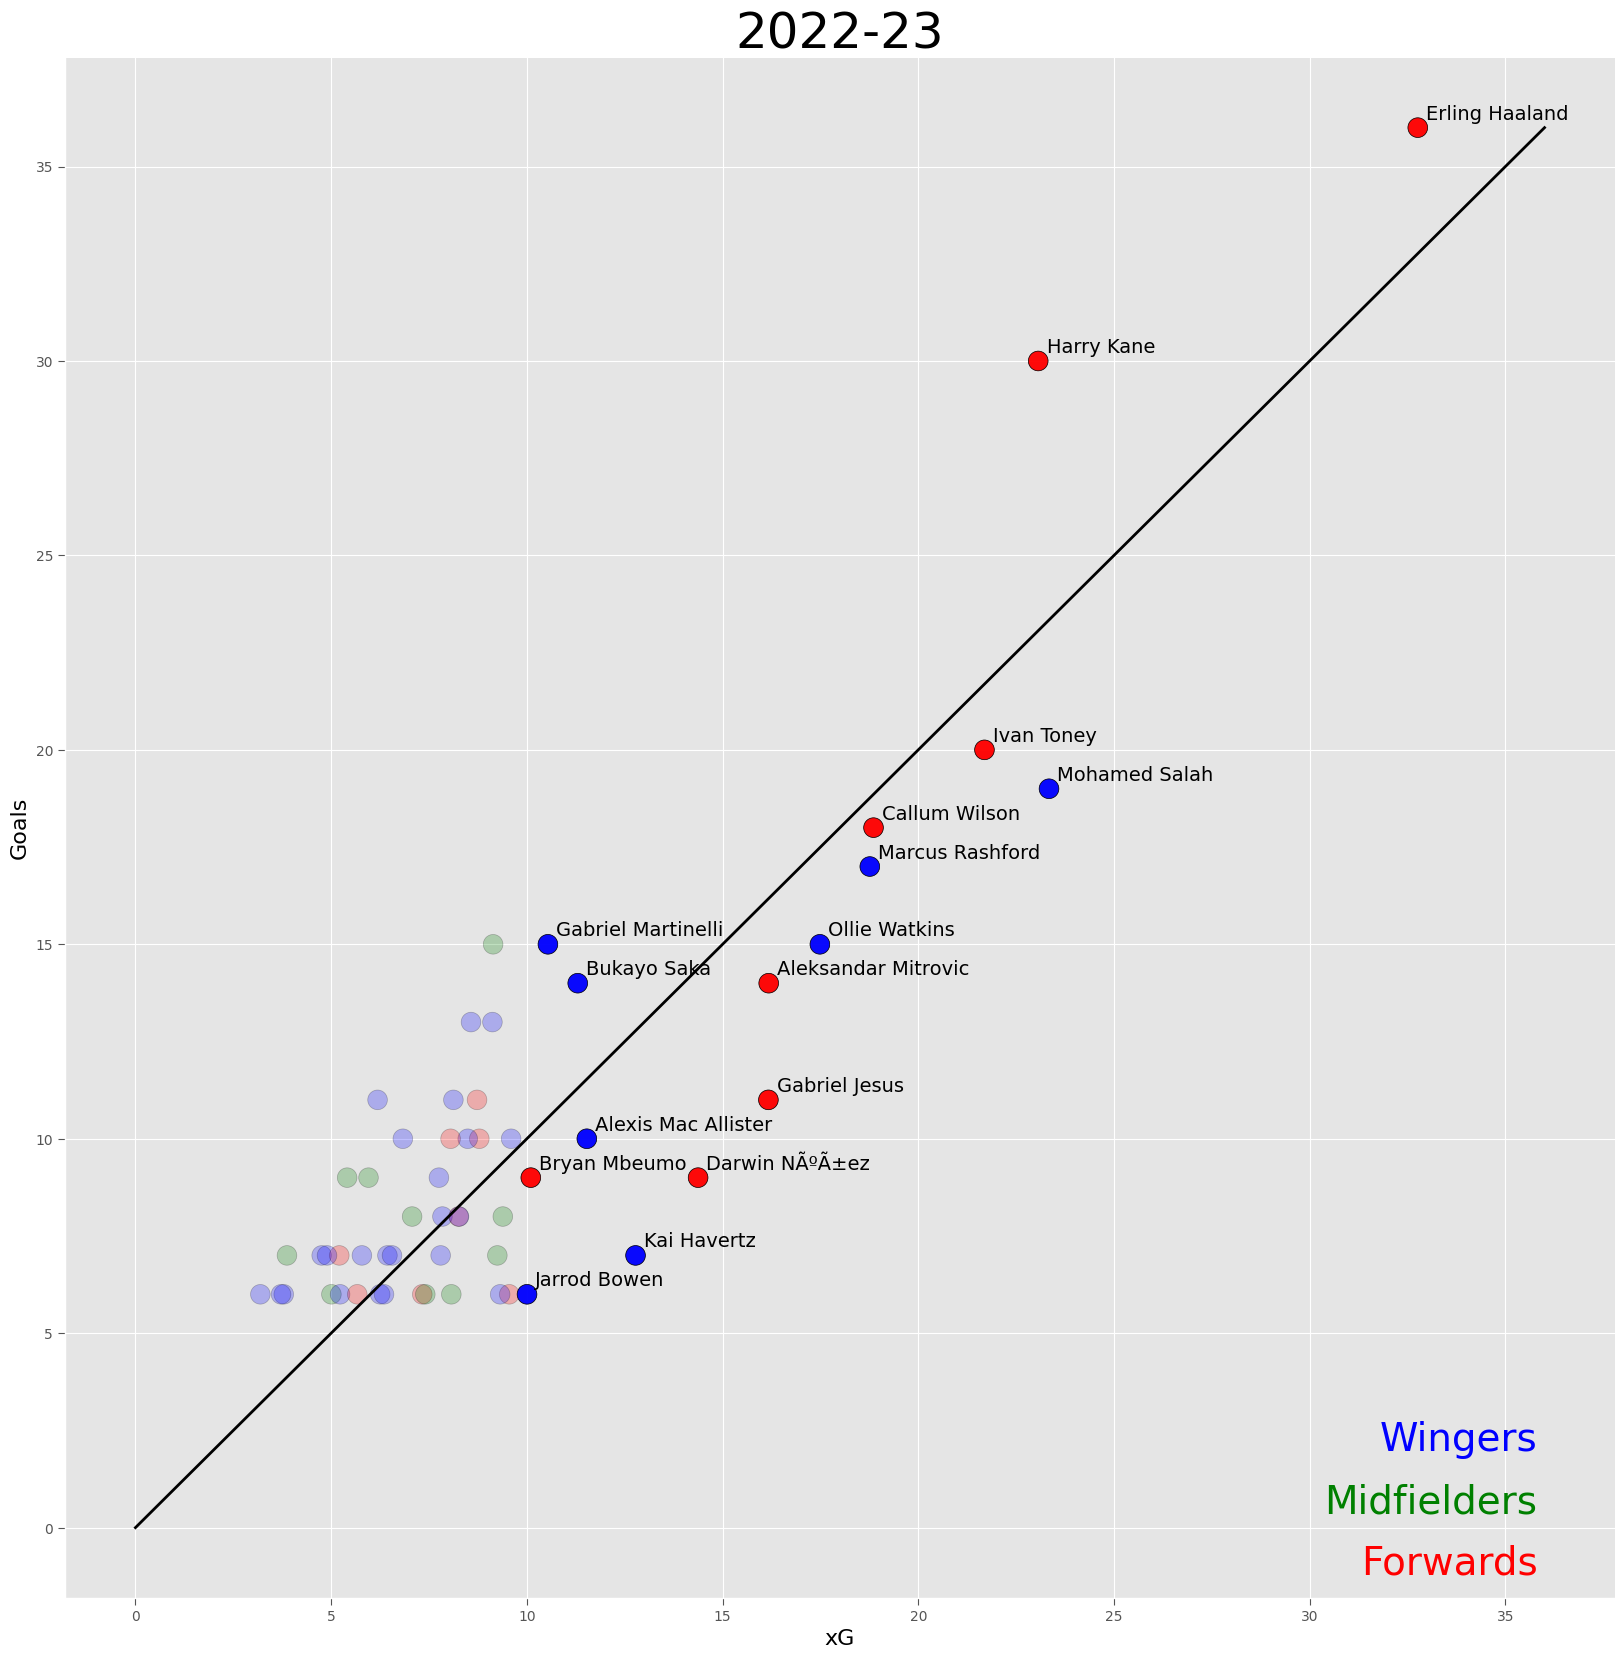

In [85]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(20,20))
plt.title('2022-23', color='black', size = 36)

n=len(goals_df['xG']) # number of data points
xs, ys = goals_df['xG'].values , goals_df['goals'].values # set y and x axis
colors = color_array(goals_df['position'].values) # denote color for each player per position


ax.scatter(xs, ys, s=200, c=colors, alpha=.25, edgecolors="black")

selected = []
k = 0
for x,y,lbl in zip(goals_df['xG'].values , goals_df['goals'].values, goals_df['player_name']):
    # this method is called for each point
    if x>10:
        selected.append(k)
        plt.annotate(lbl, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(6,6), # distance from text to points (x,y)
                     ha='left',
                     fontsize=14,
                     c='black'
                    ) # horizontal alignment can be left, right or center
    k+=1

sel_ind = np.array(selected) ##select certain indices
sel_x = xs[sel_ind]
sel_y = ys[sel_ind]
sel_cols = colors[sel_ind]
ax.scatter(sel_x, sel_y, s=200,c=sel_cols , alpha=.95, ec="black", )

plt. plot([0,36], [0,36], linewidth=2.0, color='black')

##axes cosmetics
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis="both", which = "both", size=5)
ax.set_xlabel('xG', color='black', size = 16)
ax.set_ylabel('Goals', color='black', size = 16)
ax.text(0.95, 0.01, 'Forwards',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='r', fontsize=28)
ax.text(0.95, 0.05, 'Midfielders',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='g', fontsize=28)
ax.text(0.95, 0.09, 'Wingers',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='b', fontsize=28)
plt.show()

In [111]:
def goal_ratio_perc(x, y):
    if x > 10:
        if abs(x-y)/x > 0.40:
            return True
    else:
        if abs(x-y)/x > 0.60:
            return True
    return False

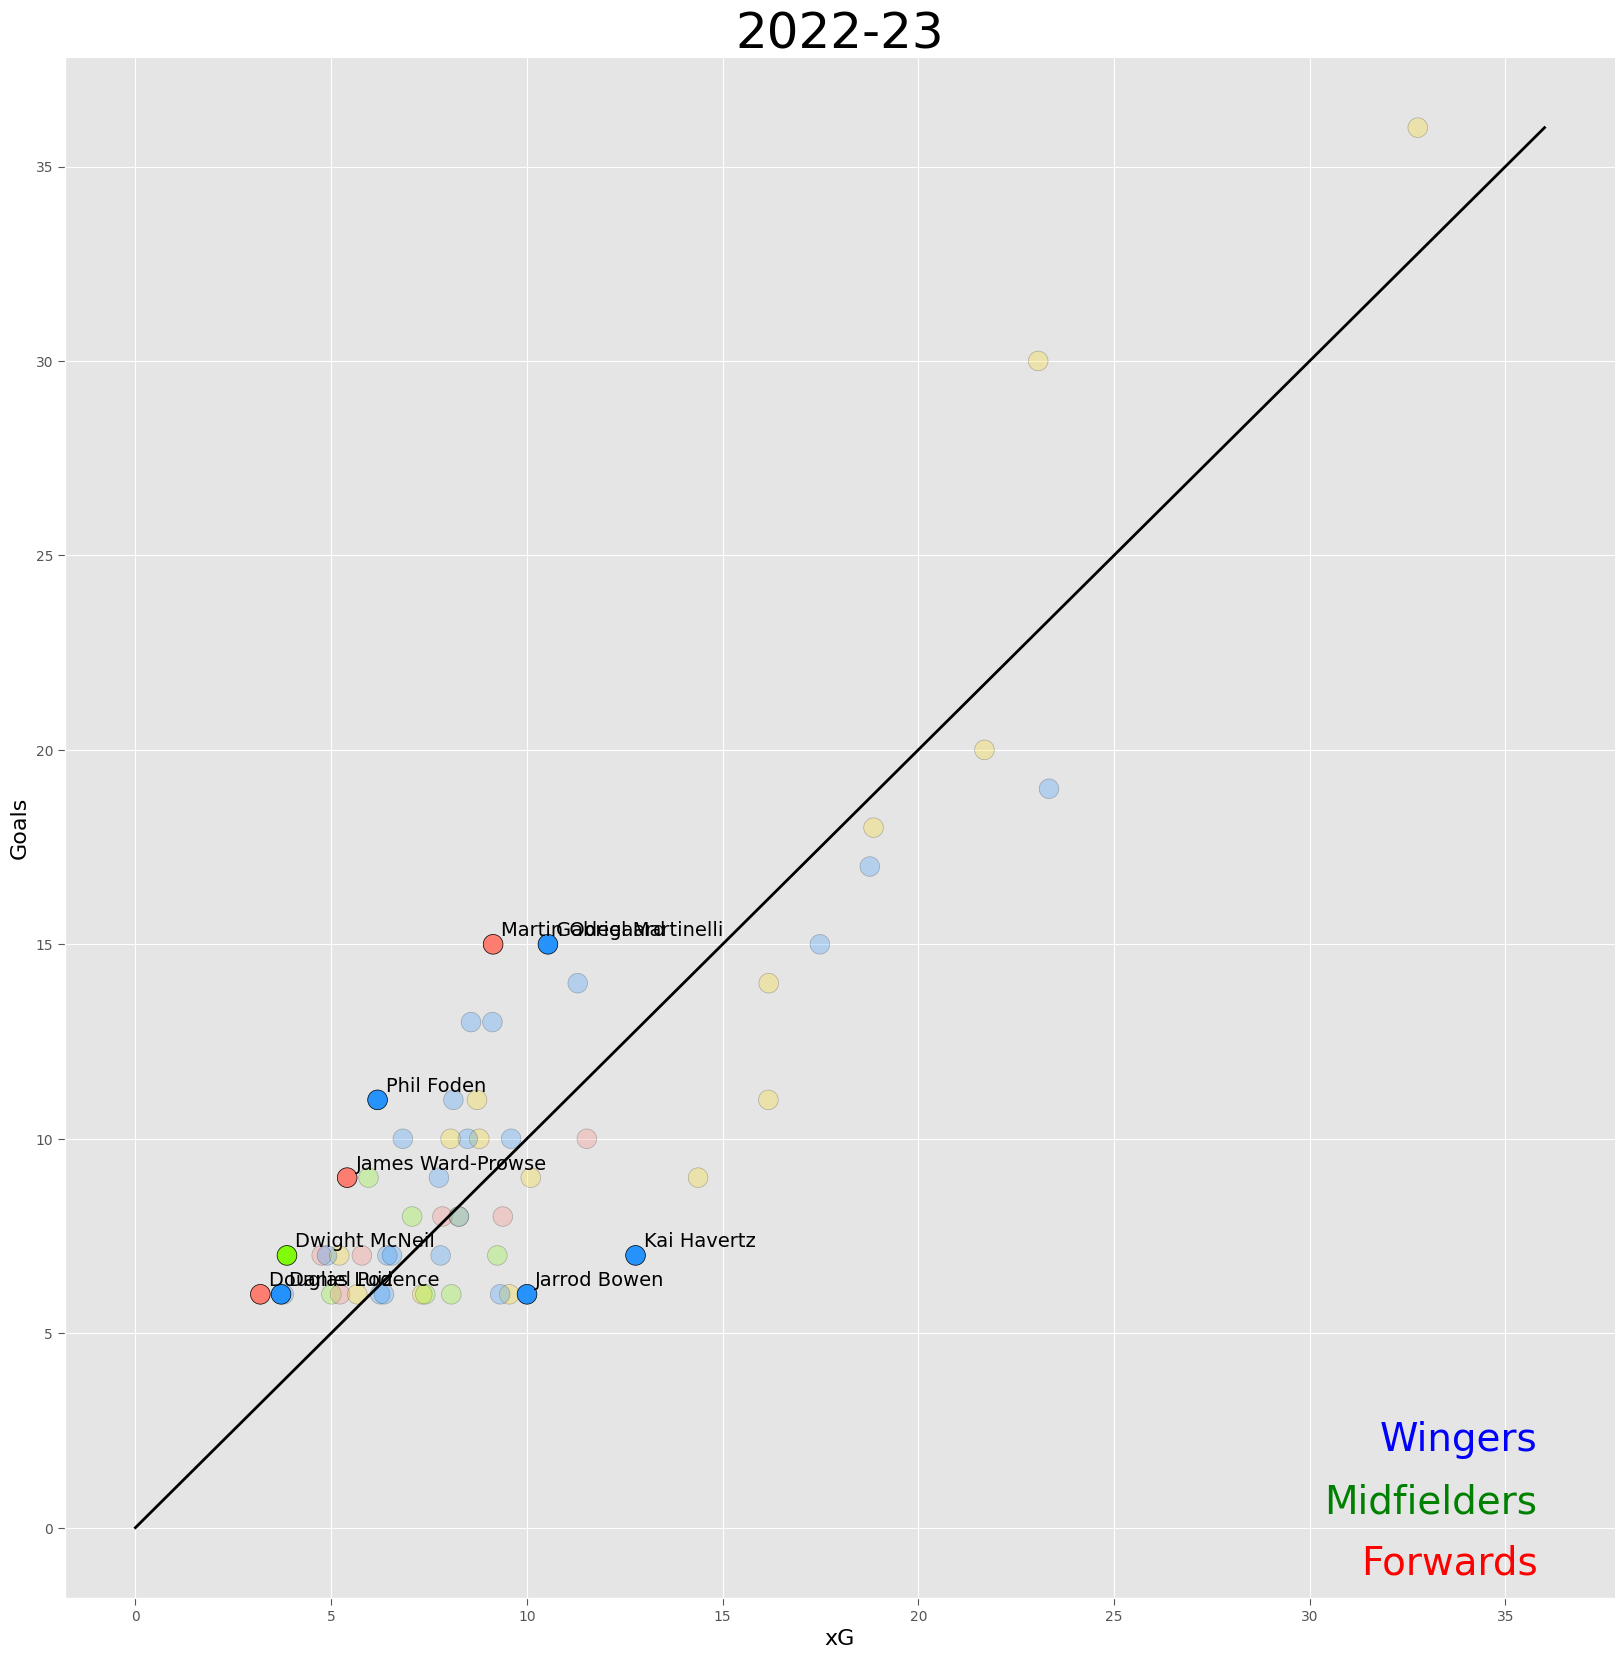

In [112]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(20,20))
plt.title('2022-23', color='black', size = 36)

n=len(goals_df['xG']) # number of data points
xs, ys = goals_df['xG'].values , goals_df['goals'].values # set y and x axis
colors = color_array(goals_df['position'].values) # denote color for each player per position


ax.scatter(xs, ys, s=200, c=colors, alpha=.25, edgecolors="black")

selected = []
k = 0
selected = []
k = 0
for x,y,lbl in zip(goals_df['xG'].values , goals_df['goals'].values, goals_df['player_name']):
    # this method is called for each point
    if goal_ratio_perc(x,y):
        selected.append(k)
        plt.annotate(lbl, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(6,6), # distance from text to points (x,y)
                     ha='left',
                     fontsize=14,
                     c='black'
                    ) # horizontal alignment can be left, right or center
    k+=1

##highlight certain selected points
sel_ind = np.array(selected) ##select certain indices
sel_x = xs[sel_ind]
sel_y = ys[sel_ind]
sel_cols = colors[sel_ind]
ax.scatter(sel_x, sel_y, s=200,c=sel_cols , alpha=.95, ec="black", )

plt. plot([0,36], [0,36], linewidth=2.0, color='black')

##axes cosmetics
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis="both", which = "both", size=5)
ax.set_xlabel('xG', color='black', size = 16)
ax.set_ylabel('Goals', color='black', size = 16)
ax.text(0.95, 0.01, 'Forwards',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='r', fontsize=28)
ax.text(0.95, 0.05, 'Midfielders',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='g', fontsize=28)
ax.text(0.95, 0.09, 'Wingers',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='b', fontsize=28)
plt.show()


In [97]:
assists_df = df[df['assists'] > 5]
assists_df.head()

,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
0,8260,Erling Haaland,35,2803,36,32.761400,8,5.849110,123,29,5,0,F S,Manchester City,29,27.433210,31.963398,3.285816
3,1250,Mohamed Salah,38,3307,19,23.340064,12,8.720246,125,65,2,0,F M S,Liverpool,17,20.295388,32.544138,8.866783
6,2517,Martin Odegaard,37,3203,15,9.137761,7,9.209957,93,77,4,0,M,Arsenal,15,9.137761,27.893760,15.047104
8,8865,Ollie Watkins,37,3150,15,17.486296,6,3.674034,85,30,4,0,F M S,Aston Villa,14,15.963957,22.162564,5.435316
10,7322,Bukayo Saka,38,3216,14,11.300050,11,7.042981,89,75,6,0,F M S,Arsenal,12,9.016542,23.583177,11.603280


In [107]:
def color_array(pos_array):
    color_arr = []
    for i in range(len(pos_array)):
        if pos_array[i] in ['F', 'F S']:
            color_arr.append('gold')
        elif pos_array[i] in ['F M S', 'F M'] :
            color_arr.append('dodgerblue')
        elif pos_array[i] in ['M', 'M S']:
            color_arr.append('xkcd:salmon')
        else:
            color_arr.append('lawngreen')
    return np.array(color_arr)

C:\Users\99vik\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


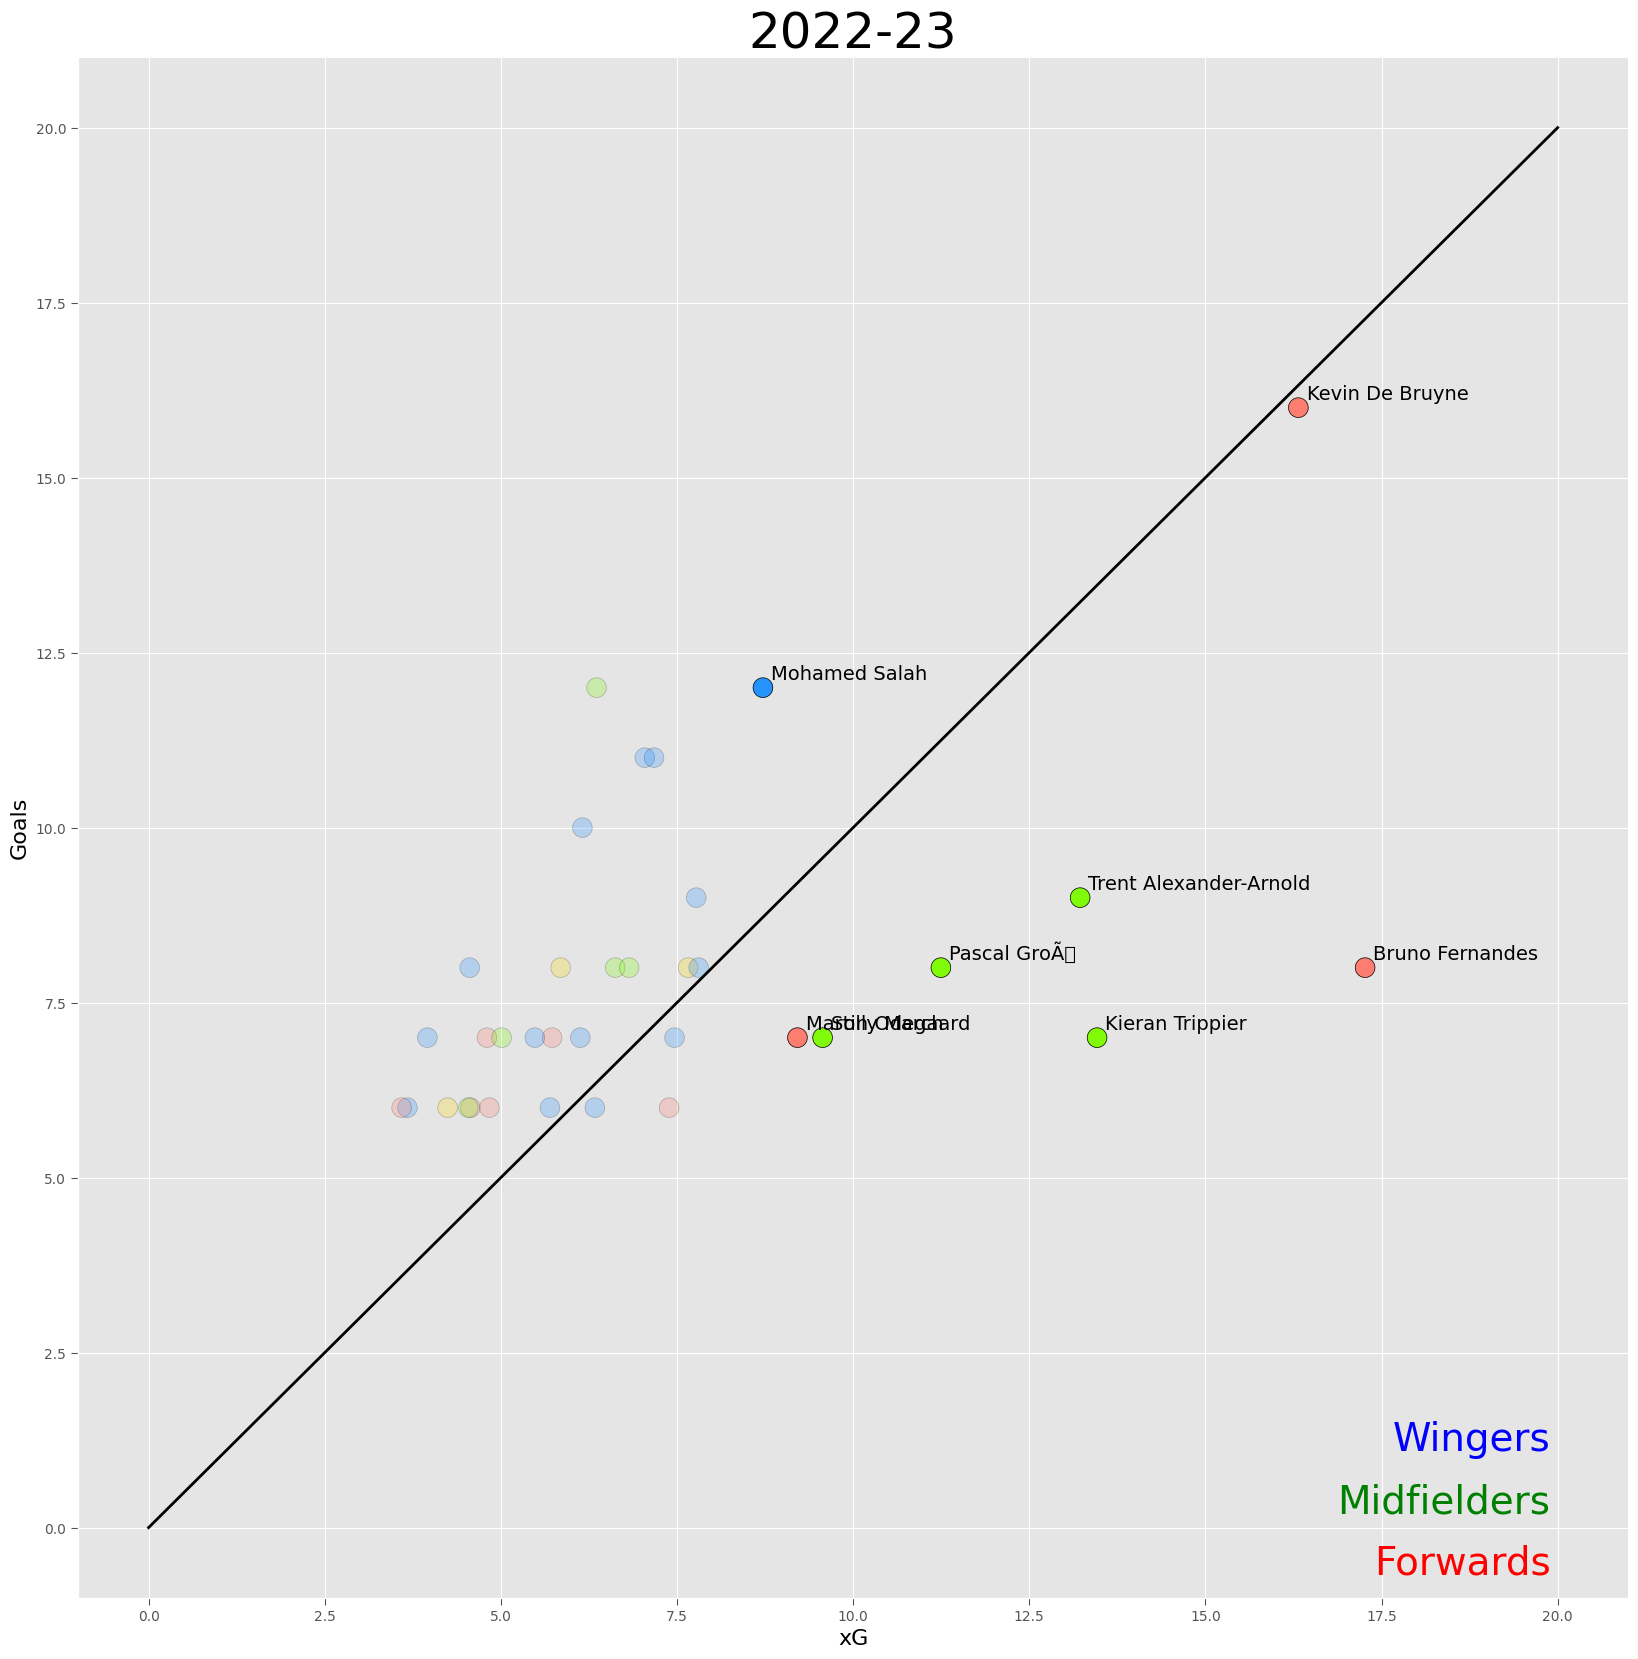

In [110]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(20,20))
plt.title('2022-23', color='black', size = 36)

n=len(assists_df['xA']) # number of data points
xs, ys = assists_df['xA'].values , assists_df['assists'].values # set y and x axis
colors = color_array(assists_df['position'].values) # denote color for each player per position


ax.scatter(xs, ys, s=200, c=colors, alpha=.25, edgecolors="black")

selected = []
k = 0
for x,y,lbl in zip(assists_df['xA'].values , assists_df['assists'].values, assists_df['player_name']):
    # this method is called for each point
    if x>8:
        selected.append(k)
        plt.annotate(lbl, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(6,6), # distance from text to points (x,y)
                     ha='left',
                     fontsize=14,
                     c='black'
                    ) # horizontal alignment can be left, right or center
    k+=1

sel_ind = np.array(selected) ##select certain indices
sel_x = xs[sel_ind]
sel_y = ys[sel_ind]
sel_cols = colors[sel_ind]
ax.scatter(sel_x, sel_y, s=200,c=sel_cols , alpha=.95, ec="black", )

plt. plot([0,20], [0,20], linewidth=2.0, color='black')

##axes cosmetics
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis="both", which = "both", size=5)
ax.set_xlabel('xG', color='black', size = 16)
ax.set_ylabel('Goals', color='black', size = 16)
ax.text(0.95, 0.01, 'Forwards',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='r', fontsize=28)
ax.text(0.95, 0.05, 'Midfielders',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='g', fontsize=28)
ax.text(0.95, 0.09, 'Wingers',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='b', fontsize=28)
plt.show()

In [121]:
def assist_ratio_perc(x, y):
    if x > 10:
        if abs(x-y)/x > 0.30:
            return True
    else:
        if abs(x-y)/x > 0.50:
            return True
    return False

C:\Users\99vik\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


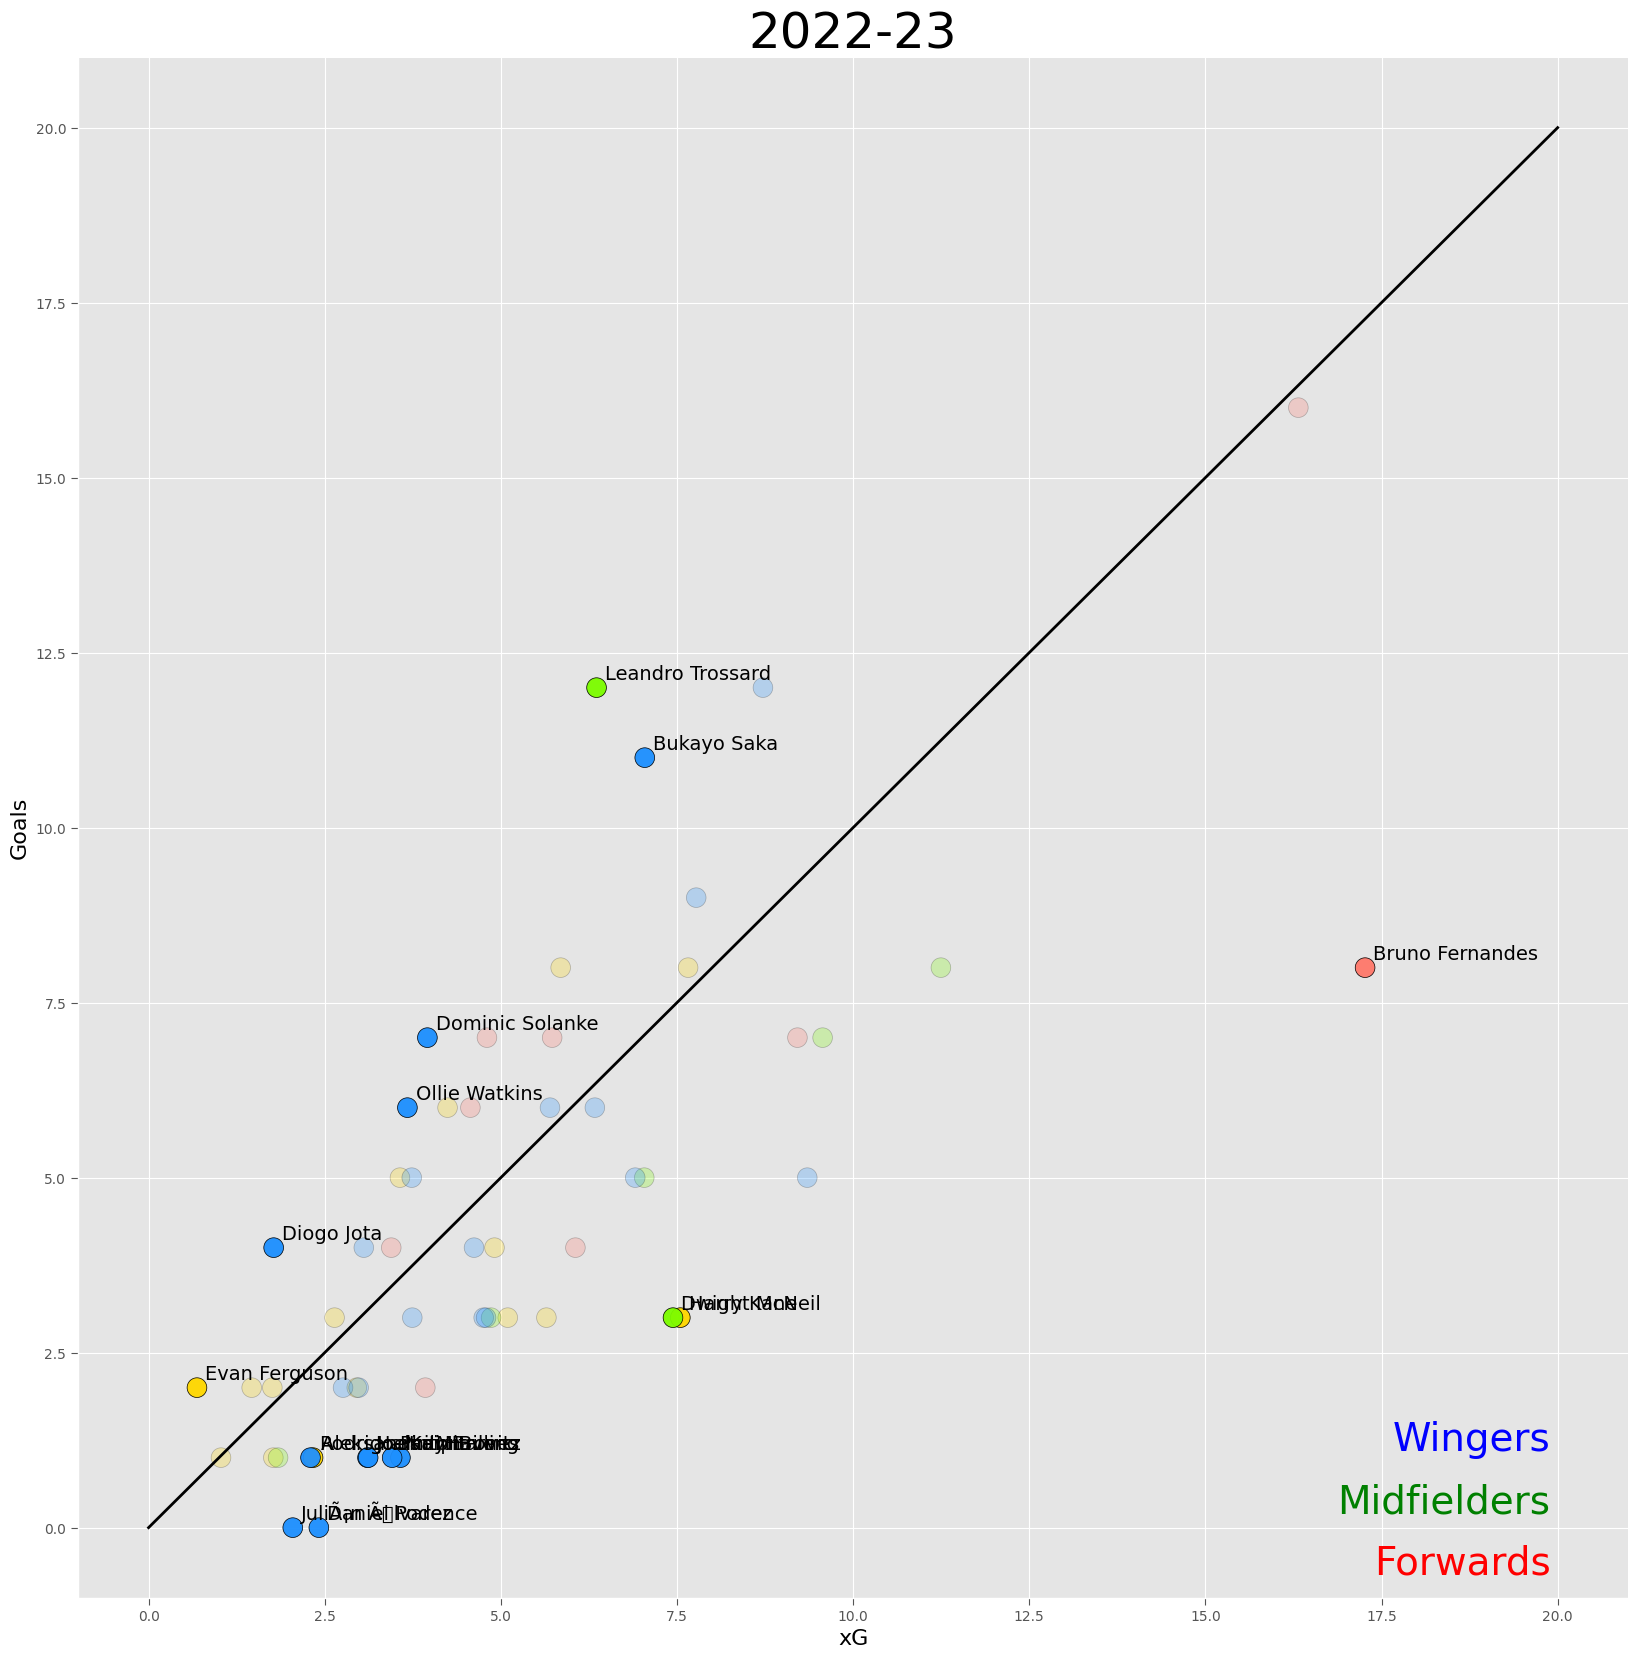

In [122]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(20,20))
plt.title('2022-23', color='black', size = 36)

n=len(goals_df['xA']) # number of data points
xs, ys = goals_df['xA'].values , goals_df['assists'].values # set y and x axis
colors = color_array(goals_df['position'].values) # denote color for each player per position


ax.scatter(xs, ys, s=200, c=colors, alpha=.25, edgecolors="black")

selected = []
k = 0
for x,y,lbl in zip(goals_df['xA'].values , goals_df['assists'].values, goals_df['player_name']):
    # this method is called for each point
    if assist_ratio_perc(x,y):
        selected.append(k)
        plt.annotate(lbl, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(6,6), # distance from text to points (x,y)
                     ha='left',
                     fontsize=14,
                     c='black'
                    ) # horizontal alignment can be left, right or center
    k+=1

##highlight certain selected points
sel_ind = np.array(selected) ##select certain indices
sel_x = xs[sel_ind]
sel_y = ys[sel_ind]
sel_cols = colors[sel_ind]
ax.scatter(sel_x, sel_y, s=200,c=sel_cols , alpha=.95, ec="black", )

plt. plot([0,20], [0,20], linewidth=2.0, color='black')

##axes cosmetics
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis="both", which = "both", size=5)
ax.set_xlabel('xG', color='black', size = 16)
ax.set_ylabel('Goals', color='black', size = 16)
ax.text(0.95, 0.01, 'Forwards',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='r', fontsize=28)
ax.text(0.95, 0.05, 'Midfielders',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='g', fontsize=28)
ax.text(0.95, 0.09, 'Wingers',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='b', fontsize=28)
plt.show()

In [135]:
minutes_df = df[df['time'] > 1500]
minutes_df['npxG_90'] = (minutes_df['npxG']/minutes_df['time'])*90
minutes_df['xGB_90'] = (minutes_df['xGBuildup']/minutes_df['time'])*90
minutes_df['xGC_90'] = (minutes_df['xGChain']/minutes_df['time'])*90


minutes_df = minutes_df[minutes_df['position'].isin(['M', 'M S'])]
minutes_df.head()

C:\Users\99vik\AppData\Local\Temp\ipykernel_11628\2242087260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minutes_df['npxG_90'] = (minutes_df['npxG']/minutes_df['time'])*90
C:\Users\99vik\AppData\Local\Temp\ipykernel_11628\2242087260.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minutes_df['xGB_90'] = (minutes_df['xGBuildup']/minutes_df['time'])*90
C:\Users\99vik\AppData\Local\Temp\ipykernel_11628\2242087260.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,...,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup,npxG_90,xGB_90,xGC_90
6,2517,Martin Odegaard,37,3203,15,9.137761,7,9.209957,93,77,...,0,M,Arsenal,15,9.137761,27.893760,15.047104,0.256759,0.422803,0.783777
21,8379,Alexis Mac Allister,35,2882,10,11.532243,2,3.928120,86,47,...,0,M S,Brighton,4,6.965230,19.910673,12.656915,0.217512,0.395254,0.621777
24,843,James Ward-Prowse,38,3378,9,5.408911,4,6.058508,44,72,...,0,M,Southampton,7,2.364234,10.548502,8.641764,0.062990,0.230242,0.281044
28,314,Ilkay GÃ¼ndogan,31,2369,8,7.842695,4,3.444545,54,37,...,0,M S,Manchester City,8,7.081527,23.573771,15.498776,0.269032,0.588810,0.895584
30,1228,Bruno Fernandes,37,3326,8,9.385457,8,17.266709,92,118,...,0,M,Manchester United,6,7.863119,35.418097,17.724953,0.212772,0.479629,0.958397


In [131]:
def color_array(pos_array):
    color_arr = []
    for i in range(len(pos_array)):
        if pos_array[i] in ['F', 'F S']:
            color_arr.append('gold')
        elif pos_array[i] in ['F M S', 'F M'] :
            color_arr.append('dodgerblue')
        elif pos_array[i] in ['M', 'M S']:
            color_arr.append('xkcd:salmon')
        else:
            color_arr.append('lawngreen')
    return np.array(color_arr)
def ratio_perc(x, y):
    if x>0.3 or y>0.45:
        return True
    return False

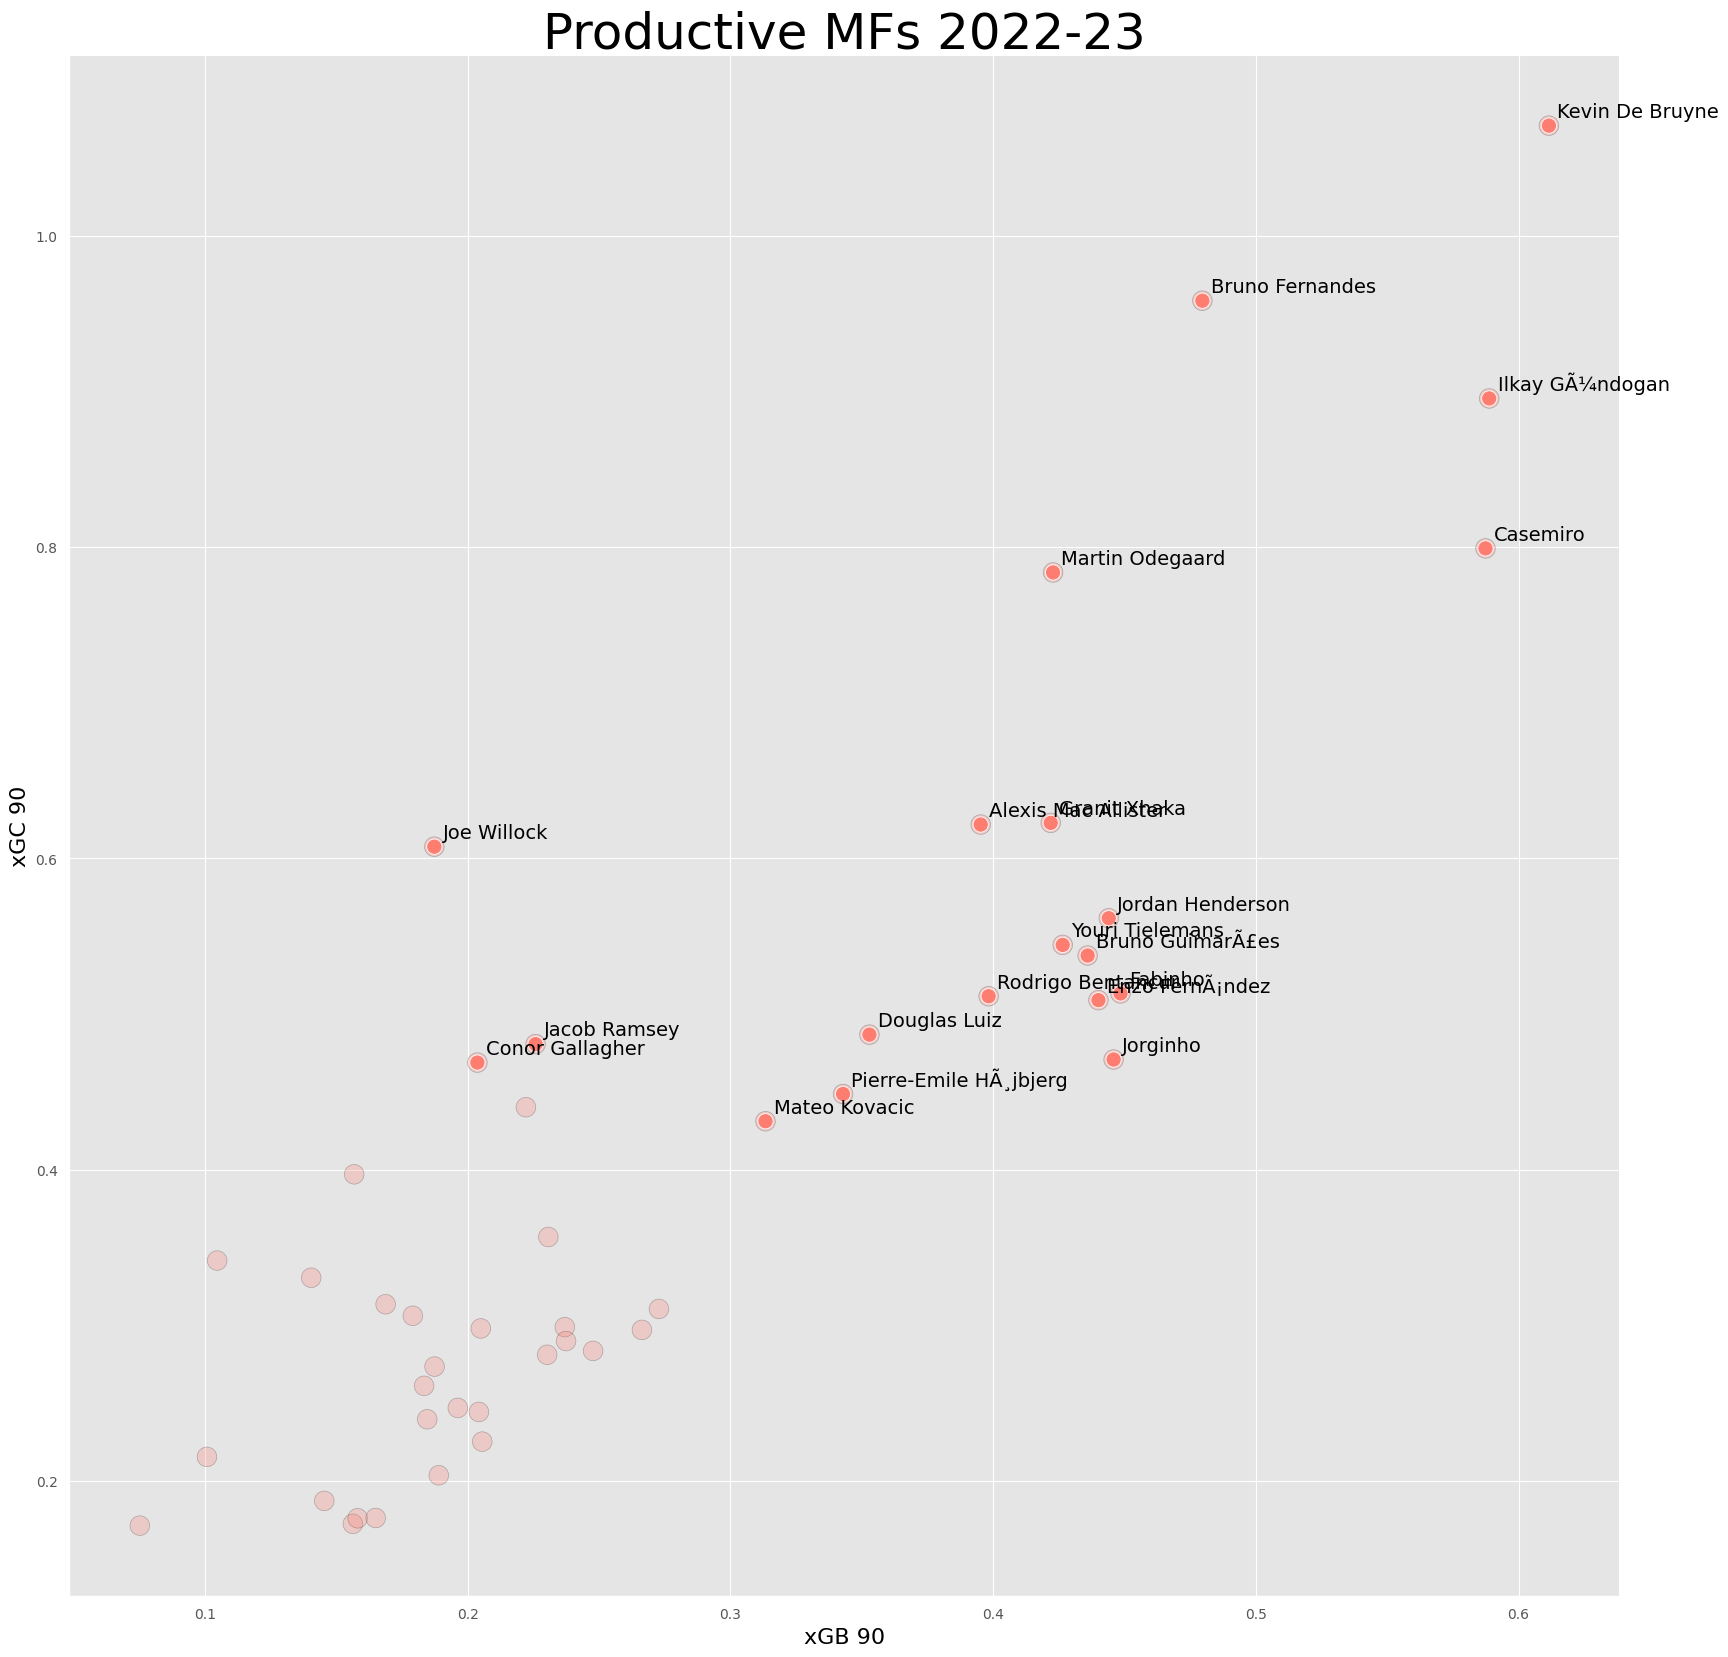

In [139]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(20,20))
plt.title('Productive MFs 2022-23', color='black', size = 36)

n=len(minutes_df['xGB_90']) # number of data points
xs, ys = minutes_df['xGB_90'].values , minutes_df['xGC_90'].values # set y and x axis
colors = color_array(minutes_df['position'].values) # denote color for each player per position

ax.scatter(xs, ys, s=200, c=colors, alpha=.25, edgecolors="black")

selected = []
k = 0
for x,y,lbl in zip(minutes_df['xGB_90'].values , minutes_df['xGC_90'].values, minutes_df['player_name']):
    # this method is called for each point
    if ratio_perc(x,y):
        selected.append(k)
        plt.annotate(lbl, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(6,6), # distance from text to points (x,y)
                     ha='left',
                     fontsize=14,
                     c='black'
                    ) # horizontal alignment can be left, right or center
    k+=1

##highlight certain selected points
sel_ind = np.array(selected) ##select certain indices
sel_x = xs[sel_ind]
sel_y = ys[sel_ind]
sel_cols = colors[sel_ind]
ax.scatter(sel_x, sel_y, s=120,c=sel_cols , alpha=.95, ec="white", linewidth=.6,) ##changed the alpha and removed the hatch for a more focused appearance



##axes cosmetics
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis="both", which = "both", size=5, bottom=False, top=False, labelbottom=True, right=False, labelright=False, left=False, labelleft=True, labeltop=False)
ax.set_xlabel('xGB 90', color='black', size = 16)
ax.set_ylabel('xGC 90', color='black', size = 16)
plt.show()

In [148]:
minutes_df = df[df['time'] > 1500]
minutes_df['npxG_90'] = (minutes_df['npxG']/minutes_df['time'])*90
minutes_df['xGB_90'] = (minutes_df['xGBuildup']/minutes_df['time'])*90
minutes_df['xGC_90'] = (minutes_df['xGChain']/minutes_df['time'])*90


minutes_df = minutes_df[minutes_df['position'].isin(['F M S', 'F M'])]
minutes_df.head()

C:\Users\99vik\AppData\Local\Temp\ipykernel_11628\1893055345.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minutes_df['npxG_90'] = (minutes_df['npxG']/minutes_df['time'])*90
C:\Users\99vik\AppData\Local\Temp\ipykernel_11628\1893055345.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minutes_df['xGB_90'] = (minutes_df['xGBuildup']/minutes_df['time'])*90
C:\Users\99vik\AppData\Local\Temp\ipykernel_11628\1893055345.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,...,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup,npxG_90,xGB_90,xGC_90
3,1250,Mohamed Salah,38,3307,19,23.340064,12,8.720246,125,65,...,0,F M S,Liverpool,17,20.295388,32.544138,8.866783,0.552339,0.241309,0.885689
5,556,Marcus Rashford,35,2907,17,18.761761,5,3.735413,108,31,...,0,F M S,Manchester United,17,18.761761,30.331114,9.589746,0.580859,0.296896,0.939044
7,7752,Gabriel Martinelli,36,2851,15,10.538134,5,9.349485,79,59,...,0,F M S,Arsenal,15,10.538134,25.150875,9.320917,0.332666,0.294242,0.793960
8,8865,Ollie Watkins,37,3150,15,17.486296,6,3.674034,85,30,...,0,F M S,Aston Villa,14,15.963957,22.162564,5.435316,0.456113,0.155295,0.633216
10,7322,Bukayo Saka,38,3216,14,11.300050,11,7.042981,89,75,...,0,F M S,Arsenal,12,9.016542,23.583177,11.603280,0.252329,0.324719,0.659977


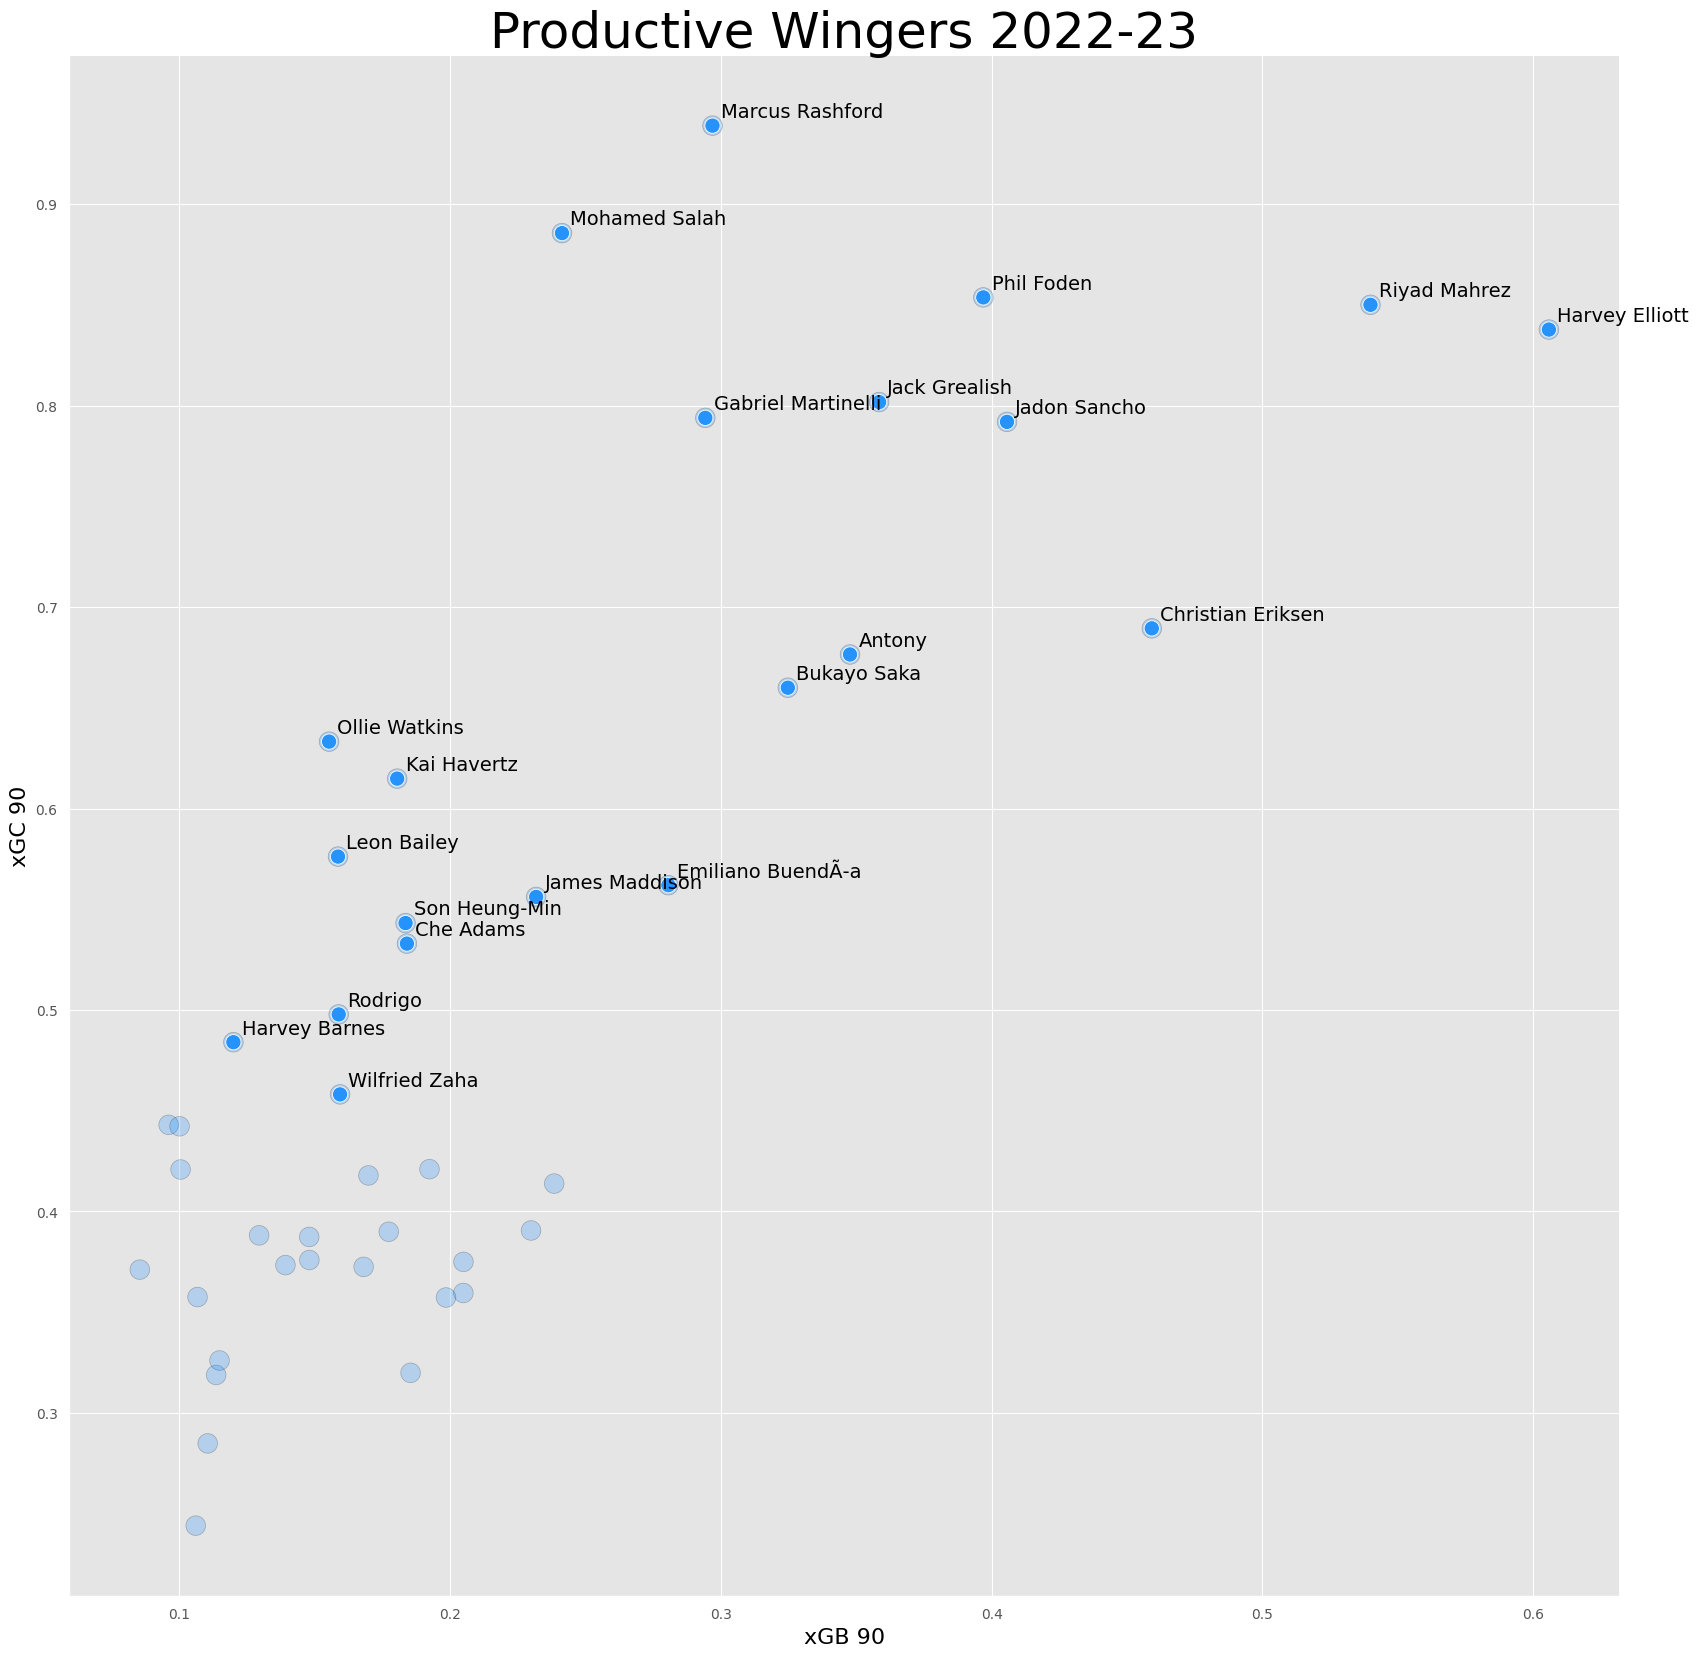

In [142]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(20,20))
plt.title('Productive Wingers 2022-23', color='black', size = 36)

n=len(minutes_df['xGB_90']) # number of data points
xs, ys = minutes_df['xGB_90'].values , minutes_df['xGC_90'].values # set y and x axis
colors = color_array(minutes_df['position'].values) # denote color for each player per position

ax.scatter(xs, ys, s=200, c=colors, alpha=.25, edgecolors="black")

selected = []
k = 0
for x,y,lbl in zip(minutes_df['xGB_90'].values , minutes_df['xGC_90'].values, minutes_df['player_name']):
    # this method is called for each point
    if ratio_perc(x,y):
        selected.append(k)
        plt.annotate(lbl, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(6,6), # distance from text to points (x,y)
                     ha='left',
                     fontsize=14,
                     c='black'
                    ) # horizontal alignment can be left, right or center
    k+=1

##highlight certain selected points
sel_ind = np.array(selected) ##select certain indices
sel_x = xs[sel_ind]
sel_y = ys[sel_ind]
sel_cols = colors[sel_ind]
ax.scatter(sel_x, sel_y, s=120,c=sel_cols , alpha=.95, ec="white", linewidth=.6,) ##changed the alpha and removed the hatch for a more focused appearance



##axes cosmetics
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis="both", which = "both", size=5, bottom=False, top=False, labelbottom=True, right=False, labelright=False, left=False, labelleft=True, labeltop=False)
ax.set_xlabel('xGB 90', color='black', size = 16)
ax.set_ylabel('xGC 90', color='black', size = 16)
plt.show()

In [144]:
minutes_df = df[df['time'] > 1500]
minutes_df['npxG_90'] = (minutes_df['npxG']/minutes_df['time'])*90
minutes_df['xGB_90'] = (minutes_df['xGBuildup']/minutes_df['time'])*90
minutes_df['xGC_90'] = (minutes_df['xGChain']/minutes_df['time'])*90


minutes_df = minutes_df[minutes_df['position'].isin(['F', 'F S'])]
minutes_df.head()

C:\Users\99vik\AppData\Local\Temp\ipykernel_11628\1651768673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minutes_df['npxG_90'] = (minutes_df['npxG']/minutes_df['time'])*90
C:\Users\99vik\AppData\Local\Temp\ipykernel_11628\1651768673.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minutes_df['xGB_90'] = (minutes_df['xGBuildup']/minutes_df['time'])*90
C:\Users\99vik\AppData\Local\Temp\ipykernel_11628\1651768673.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,...,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup,npxG_90,xGB_90,xGC_90
0,8260,Erling Haaland,35,2803,36,32.761400,8,5.849110,123,29,...,0,F S,Manchester City,29,27.433210,31.963398,3.285816,0.880838,0.105502,1.026295
1,647,Harry Kane,38,3414,30,23.064440,3,7.547408,133,57,...,0,F,Tottenham,25,18.497427,25.079118,5.095352,0.487630,0.134324,0.661137
2,998,Ivan Toney,33,2960,20,21.691198,4,4.909893,94,26,...,0,F,Brentford,14,16.363019,18.110047,4.024586,0.497524,0.122369,0.550643
4,468,Callum Wilson,31,1911,18,18.856768,5,3.567963,73,24,...,0,F S,Newcastle United,15,16.573260,15.517562,1.810891,0.780530,0.085285,0.730811
9,773,Aleksandar Mitrovic,24,2022,14,16.179017,1,2.334498,93,15,...,0,F S,Fulham,10,10.089664,11.802806,2.575260,0.449095,0.114626,0.525347


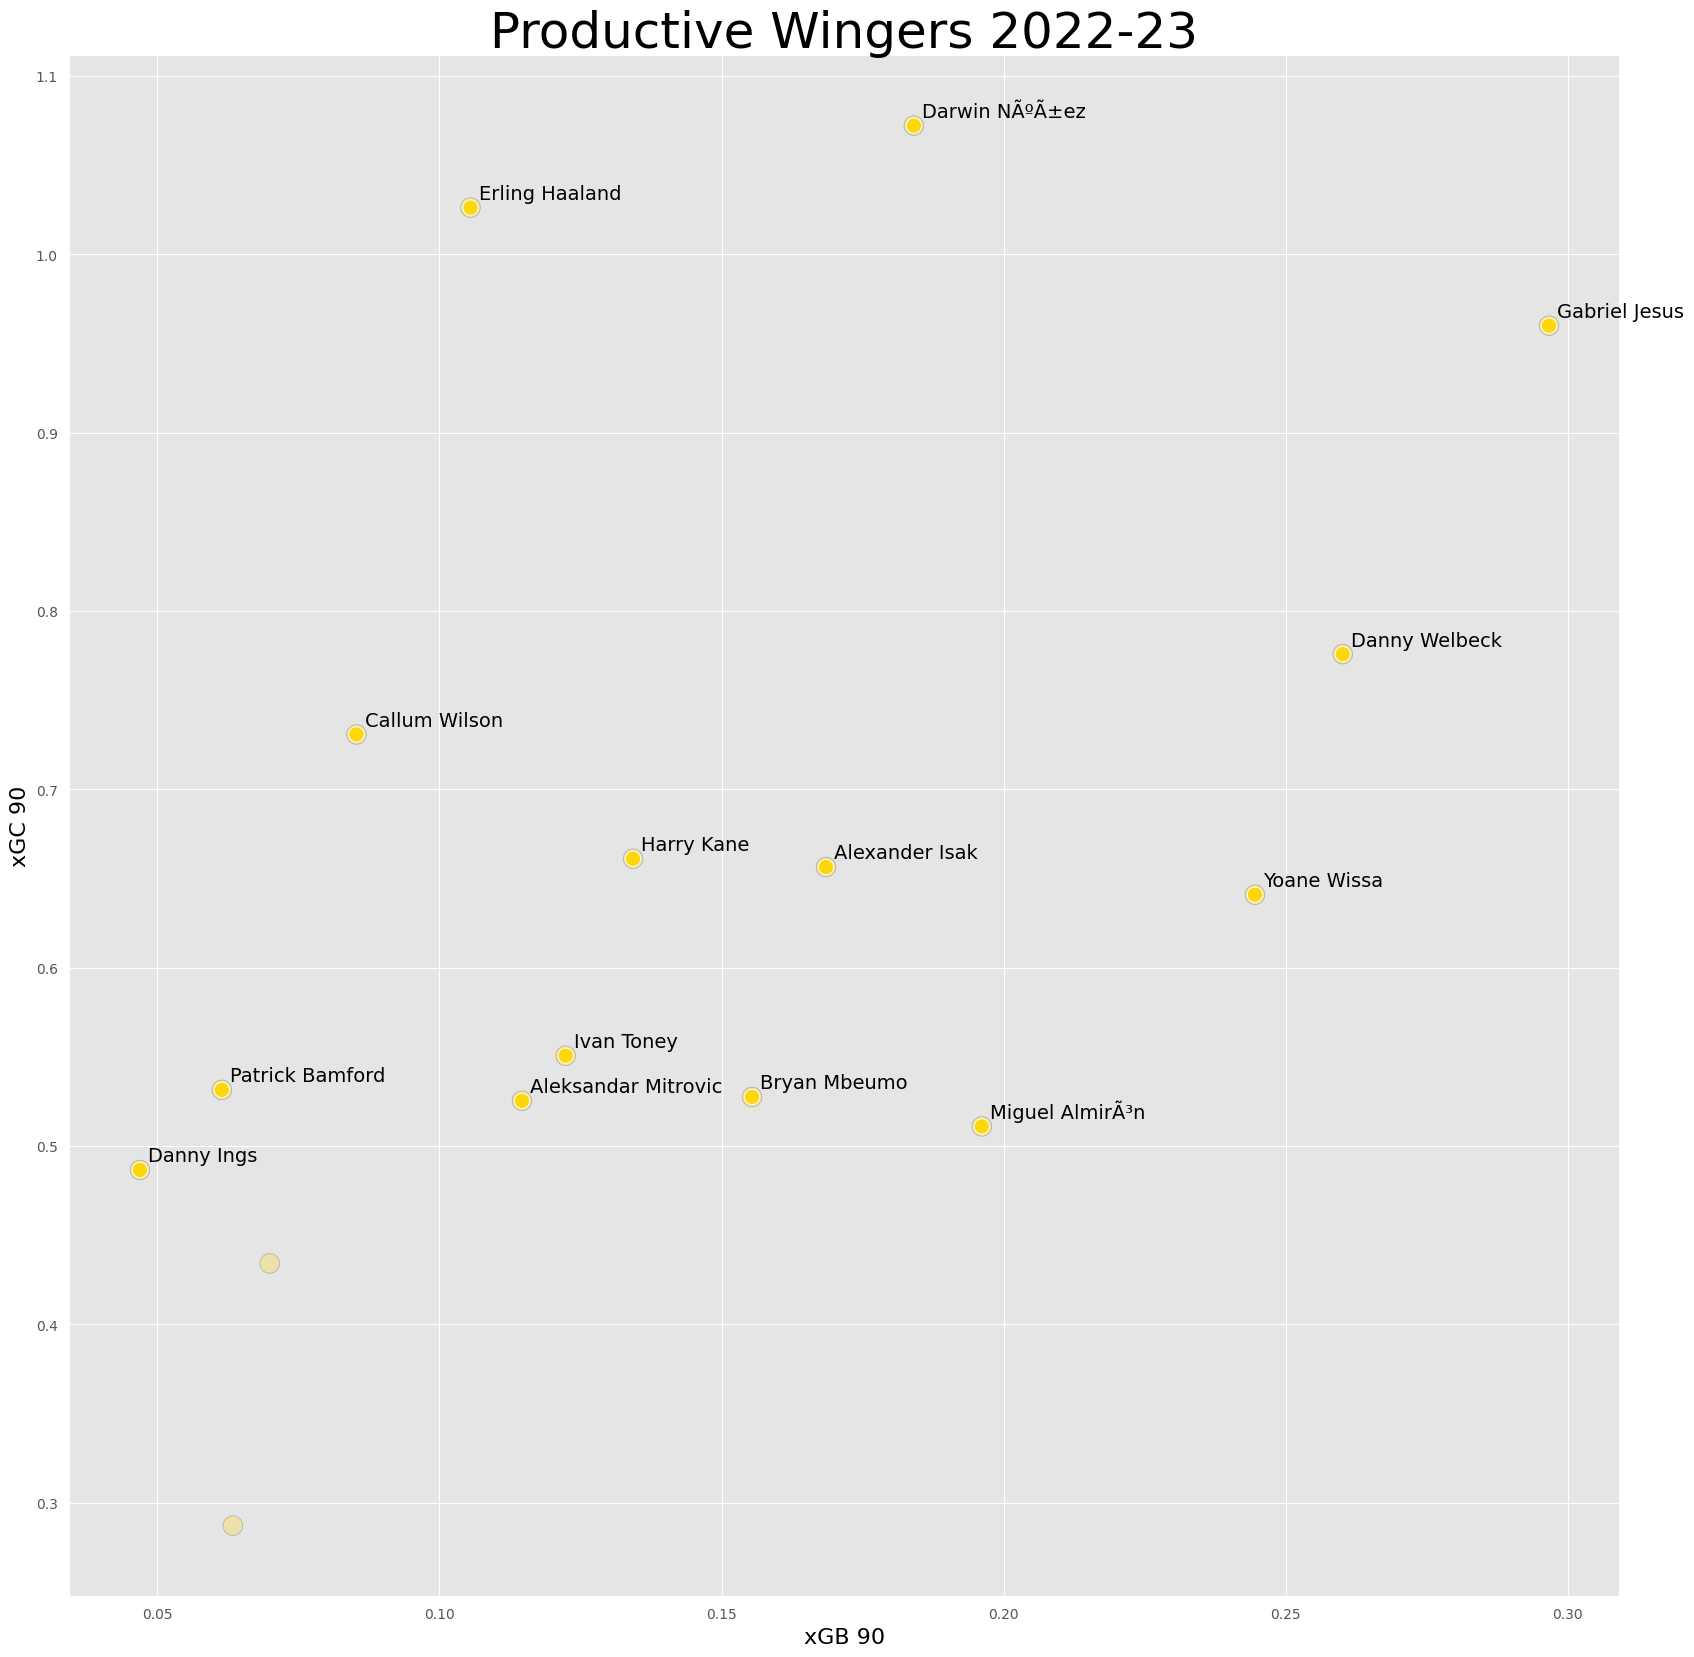

In [145]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(20,20))
plt.title('Productive Forwards 2022-23', color='black', size = 36)

n=len(minutes_df['xGB_90']) # number of data points
xs, ys = minutes_df['xGB_90'].values , minutes_df['xGC_90'].values # set y and x axis
colors = color_array(minutes_df['position'].values) # denote color for each player per position

ax.scatter(xs, ys, s=200, c=colors, alpha=.25, edgecolors="black")

selected = []
k = 0
for x,y,lbl in zip(minutes_df['xGB_90'].values , minutes_df['xGC_90'].values, minutes_df['player_name']):
    # this method is called for each point
    if ratio_perc(x,y):
        selected.append(k)
        plt.annotate(lbl, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(6,6), # distance from text to points (x,y)
                     ha='left',
                     fontsize=14,
                     c='black'
                    ) # horizontal alignment can be left, right or center
    k+=1

##highlight certain selected points
sel_ind = np.array(selected) ##select certain indices
sel_x = xs[sel_ind]
sel_y = ys[sel_ind]
sel_cols = colors[sel_ind]
ax.scatter(sel_x, sel_y, s=120,c=sel_cols , alpha=.95, ec="white", linewidth=.6,) ##changed the alpha and removed the hatch for a more focused appearance



##axes cosmetics
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis="both", which = "both", size=5, bottom=False, top=False, labelbottom=True, right=False, labelright=False, left=False, labelleft=True, labeltop=False)
ax.set_xlabel('xGB 90', color='black', size = 16)
ax.set_ylabel('xGC 90', color='black', size = 16)
plt.show()